<a href="https://colab.research.google.com/github/BernardoNilson/Algorithms-DataStrucures-II/blob/main/ExerciciosAnaliseComplexidade20221.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercícios - Analisando as Classes de Complexidade de Algoritmos Diversos

### Prof. Marcelo Cohen

Com base no que já foi apresentado em aula, faça experimentos com cada um dos algoritmos abaixo: conte a quantidade de operações, faça gráficos e tente determinar qual é a função característica de cada um. Este é um excelente exercício para praticar os conceitos que vimos.

Ou seja, a ideia aqui **não é** entender o que cada algoritmo faz, mas como se comporta com um **n** cada vez maior.

Você pode usar a implementação em Python fornecida (que é mais conveniente, pois permite fazer tudo aqui) ou transcrever para a linguagem da sua preferência.

## Algoritmo 1

In [5]:
def f1(n):
  res = 0
  for i in range(n-1, n*n+1):    # conta de n-1 até n*n
    for j in range(i, n*n+1, i): # conta de i até n*n, de i em i
      for k in range(0, n+1, i): # conta de 0 até n, de i em i
        res += 1
  return res

In [6]:
# Programa principal
for n in range(2,30):
  print(n,f1(n))

2 18
3 21
4 35
5 53
6 78
7 106
8 142
9 184
10 233
11 288
12 351
13 418
14 495
15 580
16 671
17 770
18 878
19 992
20 1116
21 1246
22 1385
23 1532
24 1692
25 1853
26 2027
27 2208
28 2402
29 2601


Para fazer o gráfico, siga o seguinte modelo (x e y são **listas**, estrutura de dados nativa do Python).

In [7]:
# Isto só precisa ser feito UMA vez
import matplotlib.pyplot as plt # pacote gráfico
import math
plt.style.use('fivethirtyeight') # estilo dos gráficos

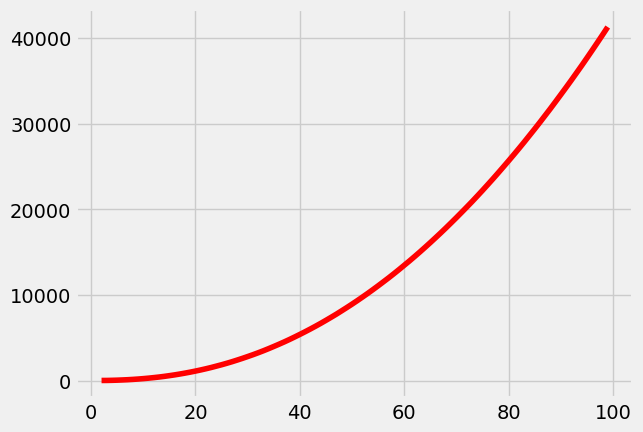

In [8]:
x = [] # lista vazia: coordenadas x
y = [] # lista vazia: coordenadas y
for n in range(2,100):
  x.append(n)     # acrescenta o valor atual de n no final da lista x
  y.append(f1(n)) # acrescenta o valor da função no fina da lista y

# Desenha o gráfico com linhas vermelhas
# (para usar escala logarítmica, descomente uma ou ambas linhas abaixo)
#plt.yscale("log") # usa escala log para y (precisa ser feito a CADA novo gráfico)
#plt.xscale("log") # idem, para x
plt.plot(x,y,'r-')
plt.show()


Lembre-se das **duas técnicas** simples que vimos: ao usar as escalas logarítmicas, conseguimos facilmente identificar o comportamento exponencial ou polinomial. A partir daí, é possível determinar o **expoente** da função, ou o **grau** do polinômio:

In [9]:
# Se for exponencial:

# Calcula o valor de dois pontos da função
a = 2
b = 100
fa = f1(a)
fb = f1(b)
print(fa,fb)
# Inclinação da reta (r) será aprox. (log(fb)-log(fa))/(b-a)
r = (math.log(fb) - math.log(fa))/ (b-a)
# E o expoente é exp(r)
base = math.exp(r)
print("Base aproximada da função exponencial:", base)

18 42236
Base aproximada da função exponencial: 1.0824103631165825


$r \approx \frac{\log(f(b))-\log(f(a))}{b-a}, base = e^{r}$

In [10]:
# Se for polinomial:

# Calcula o valor de dois pontos da função
a = 2
b = 100
fa = f1(a)
fb = f1(b)
expoente = (math.log(fb)-math.log(fa))/(math.log(b)-math.log(a))
print("Expoente aproximado da função polinomial:", expoente)

Expoente aproximado da função polinomial: 1.983796222123925


$expoente \approx \frac{\log(f(b)) - \log(f(a))}{\log(b)-\log(a)}$

## Algoritmo 2

In [11]:
def f2(n):
  res = 0
  for i in range(n//2, n+2, 2):     # de n/2 até n+1, de 2 em 2
    for j in range(n//2, n*n+1, i): # de n/2 até n*n, de i em i
      for k in range(j, j+2):       # de j até j+1
        res += 1
  return res

In [12]:
# Programa principal
for n in range(2,10):
  print(n,f2(n))

2 12
3 24
4 24
5 44
6 48
7 66
8 70
9 102


In [13]:
# Continuação...

Para fazer o gráfico, siga o seguinte modelo (x e y são **listas**, estrutura de dados nativa do Python).

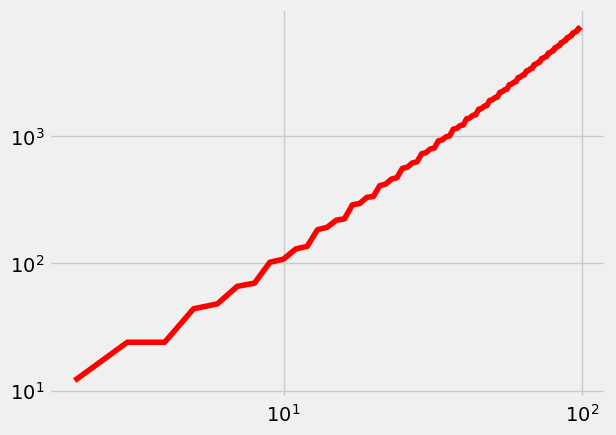

In [24]:
x = [] # lista vazia: coordenadas x
y = [] # lista vazia: coordenadas y
for n in range(2,100):
  x.append(n)     # acrescenta o valor atual de n no final da lista x
  y.append(f2(n)) # acrescenta o valor da função no fina da lista y

# Desenha o gráfico com linhas vermelhas
# (para usar escala logarítmica, descomente uma ou ambas linhas abaixo)
plt.yscale("log") # usa escala log para y (precisa ser feito a CADA novo gráfico)
plt.xscale("log") # idem, para x
plt.plot(x,y,'r-')
plt.show()


Lembre-se das **duas técnicas** simples que vimos: ao usar as escalas logarítmicas, conseguimos facilmente identificar o comportamento exponencial ou polinomial. A partir daí, é possível determinar o **expoente** da função, ou o **grau** do polinômio:

In [39]:
# Se for polinomial:

# Calcula o valor de dois pontos da função
a = 2
b = 100
fa = f2(a)
fb = f2(b)
expoente = (math.log(fb)-math.log(fa))/(math.log(b)-math.log(a))
print("Expoente aproximado da função polinomial:", expoente)

Expoente aproximado da função polinomial: 1.6360480080071391


$expoente \approx \frac{\log(f(b)) - \log(f(a))}{\log(b)-\log(a)}$

## Algoritmo 3

In [30]:
def f3(n):
  res = 0
  for i in range(n//2,2*n+1):       # de n/2 até 2*n
    for j in range(n//2,n+i+1,i):   # de n/2 até n+i, passo i
      for k in range(2,i*i+1, i-1): # de 2 até i*i, passo i-1
        res += 1
  return res

# Dica: comece com n=4

In [33]:
# Programa principal
for n in range(4,10):
  print(n, f3(n))

4 87
5 133
6 174
7 237
8 291
9 371


Para fazer o gráfico, siga o seguinte modelo (x e y são **listas**, estrutura de dados nativa do Python).

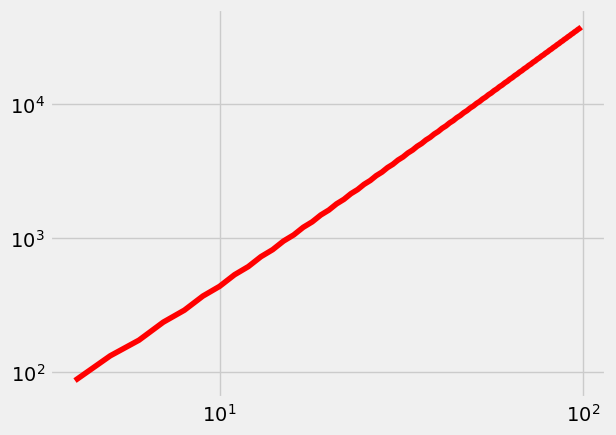

In [35]:
x = [] # lista vazia: coordenadas x
y = [] # lista vazia: coordenadas y
for n in range(4,100):
  x.append(n)     # acrescenta o valor atual de n no final da lista x
  y.append(f3(n)) # acrescenta o valor da função no final da lista y

# Desenha o gráfico com linhas vermelhas
# (para usar escala logarítmica, descomente uma ou ambas linhas abaixo)
plt.yscale("log") # usa escala log para y (precisa ser feito a CADA novo gráfico)
plt.xscale("log") # idem, para x
plt.plot(x,y,'r-')
plt.show()


Lembre-se das **duas técnicas** simples que vimos: ao usar as escalas logarítmicas, conseguimos facilmente identificar o comportamento exponencial ou polinomial. A partir daí, é possível determinar o **expoente** da função, ou o **grau** do polinômio:

In [38]:
# Se for polinomial:

# Calcula o valor de dois pontos da função
a = 4
b = 100
fa = f3(a)
fb = f3(b)
expoente = (math.log(fb)-math.log(fa))/(math.log(b)-math.log(a))
print("Expoente aproximado da função polinomial:", expoente)

Expoente aproximado da função polinomial: 1.8895230852115528


$expoente \approx \frac{\log(f(b)) - \log(f(a))}{\log(b)-\log(a)}$

## Algoritmo 4

In [16]:
def f4(n):
  res = 0
  for i in range(0,n+2,2):      # 0 a n+1, passo 2
    for j in range(i,n+1,2):    # i a n, passo 2
      for k in range(i//2,j+2): # i/2 a j+1
        res += 1
  return res

In [47]:
# Programa principal
for n in range(4,50):
  print(n, f4(n))

4 24
5 24
6 50
7 50
8 90
9 90
10 147
11 147
12 224
13 224
14 324
15 324
16 450
17 450
18 605
19 605
20 792
21 792
22 1014
23 1014
24 1274
25 1274
26 1575
27 1575
28 1920
29 1920
30 2312
31 2312
32 2754
33 2754
34 3249
35 3249
36 3800
37 3800
38 4410
39 4410
40 5082
41 5082
42 5819
43 5819
44 6624
45 6624
46 7500
47 7500
48 8450
49 8450


Para fazer o gráfico, siga o seguinte modelo (x e y são **listas**, estrutura de dados nativa do Python).

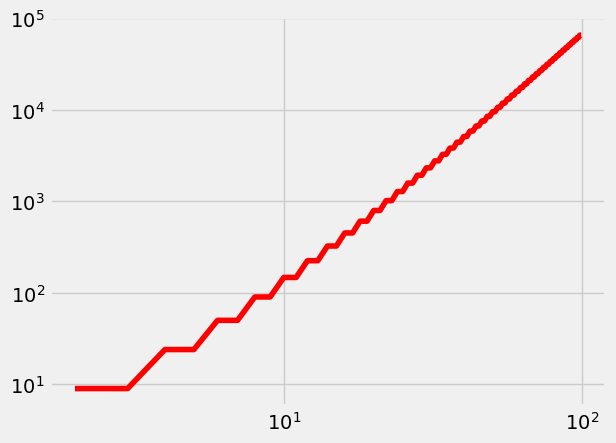

In [45]:
x = [] # lista vazia: coordenadas x
y = [] # lista vazia: coordenadas y
for n in range(2,100):
  x.append(n)     # acrescenta o valor atual de n no final da lista x
  y.append(f4(n)) # acrescenta o valor da função no fina da lista y

# Desenha o gráfico com linhas vermelhas
# (para usar escala logarítmica, descomente uma ou ambas linhas abaixo)
plt.yscale("log") # usa escala log para y (precisa ser feito a CADA novo gráfico)
plt.xscale("log") # idem, para x
plt.plot(x,y,'r-')
plt.show()


Lembre-se das **duas técnicas** simples que vimos: ao usar as escalas logarítmicas, conseguimos facilmente identificar o comportamento exponencial ou polinomial. A partir daí, é possível determinar o **expoente** da função, ou o **grau** do polinômio:

In [46]:
# Se for polinomial:

# Calcula o valor de dois pontos da função
a = 2
b = 100
fa = f4(a)
fb = f4(b)
expoente = (math.log(fb)-math.log(fa))/(math.log(b)-math.log(a))
print("Expoente aproximado da função polinomial:", expoente)

Expoente aproximado da função polinomial: 2.2862701215153405


$expoente \approx \frac{\log(f(b)) - \log(f(a))}{\log(b)-\log(a)}$

## Algoritmo 5

In [18]:
def f5(n,d):
  if n < 0:
    return d
  return f5(n-1,1-d) + f5(n-2,d)

# Chame com f5(n,1)

In [57]:
# Programa principal
for n in range(2,20):
  print(n, f5(n, 1))

2 2
3 5
4 5
5 13
6 13
7 34
8 34
9 89
10 89
11 233
12 233
13 610
14 610
15 1597
16 1597
17 4181
18 4181
19 10946


Para fazer o gráfico, siga o seguinte modelo (x e y são **listas**, estrutura de dados nativa do Python).

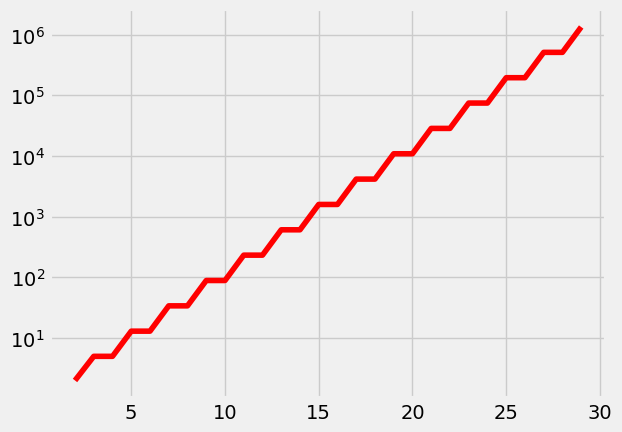

In [54]:
x = [] # lista vazia: coordenadas x
y = [] # lista vazia: coordenadas y
for n in range(2,30):
  x.append(n)     # acrescenta o valor atual de n no final da lista x
  y.append(f5(n, 1)) # acrescenta o valor da função no fina da lista y

# Desenha o gráfico com linhas vermelhas
# (para usar escala logarítmica, descomente uma ou ambas linhas abaixo)
plt.yscale("log") # usa escala log para y (precisa ser feito a CADA novo gráfico)
#plt.xscale("log") # idem, para x
plt.plot(x,y,'r-')
plt.show()


Lembre-se das **duas técnicas** simples que vimos: ao usar as escalas logarítmicas, conseguimos facilmente identificar o comportamento exponencial ou polinomial. A partir daí, é possível determinar o **expoente** da função, ou o **grau** do polinômio:

In [56]:
# Se for exponencial:

# Calcula o valor de dois pontos da função
a = 2
b = 30
fa = f5(a, 1)
fb = f5(b, 1)
print(fa,fb)
# Inclinação da reta (r) será aprox. (log(fb)-log(fa))/(b-a)
r = (math.log(fb) - math.log(fa))/ (b-a)
# E o expoente é exp(r)
base = math.exp(r)
print("Base aproximada da função exponencial:", base)

2 1346269
Base aproximada da função exponencial: 1.614903198254369


$r \approx \frac{\log(f(b))-\log(f(a))}{b-a}, base = e^{r}$

## Algoritmo 6

In [19]:
def f6(n,d):
  global op
  op += 1
  if n == 0:
    return d
  return 3 * f6(n-1,1-d)

# Chame com f6(n,1), o total de operações volta na variável
# op (lembre-se de ZERAR a varíavel antes de cada chamada)

In [72]:
# Programa principal
for n in range(2,100):
  op = 0
  f6(n, 1)
  print(n, op)

2 3
3 4
4 5
5 6
6 7
7 8
8 9
9 10
10 11
11 12
12 13
13 14
14 15
15 16
16 17
17 18
18 19
19 20
20 21
21 22
22 23
23 24
24 25
25 26
26 27
27 28
28 29
29 30
30 31
31 32
32 33
33 34
34 35
35 36
36 37
37 38
38 39
39 40
40 41
41 42
42 43
43 44
44 45
45 46
46 47
47 48
48 49
49 50
50 51
51 52
52 53
53 54
54 55
55 56
56 57
57 58
58 59
59 60
60 61
61 62
62 63
63 64
64 65
65 66
66 67
67 68
68 69
69 70
70 71
71 72
72 73
73 74
74 75
75 76
76 77
77 78
78 79
79 80
80 81
81 82
82 83
83 84
84 85
85 86
86 87
87 88
88 89
89 90
90 91
91 92
92 93
93 94
94 95
95 96
96 97
97 98
98 99
99 100


Para fazer o gráfico, siga o seguinte modelo (x e y são **listas**, estrutura de dados nativa do Python).

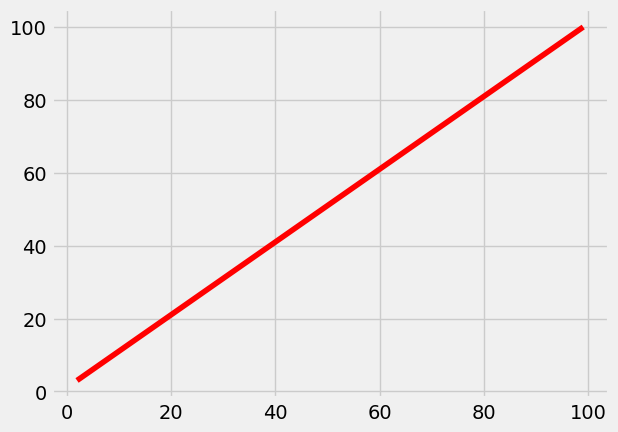

In [71]:
x = [] # lista vazia: coordenadas x
y = [] # lista vazia: coordenadas y
for n in range(2,100):
  op = 0
  f6(n, 1)
  x.append(n)     # acrescenta o valor atual de n no final da lista x
  y.append(op) # acrescenta o valor da função no fina da lista y

# Desenha o gráfico com linhas vermelhas
# (para usar escala logarítmica, descomente uma ou ambas linhas abaixo)
#plt.yscale("log") # usa escala log para y (precisa ser feito a CADA novo gráfico)
#plt.xscale("log") # idem, para x
plt.plot(x,y,'r-')
plt.show()


Lembre-se das **duas técnicas** simples que vimos: ao usar as escalas logarítmicas, conseguimos facilmente identificar o comportamento exponencial ou polinomial. A partir daí, é possível determinar o **expoente** da função, ou o **grau** do polinômio:

## Algoritmo 7

In [20]:
def f7(n):
  res = 0
  s = int(math.sqrt(n))
  for i in range(1,n+1):      # 1 a n
    for j in range(1,s+1):    # 1 a sqrt(n)
      for k in range(1,i+1):  # 1 a i
        res += 1
  return res

In [73]:
# Programa principal
for n in range(2,100):
  print(n, f7(n))

2 3
3 6
4 20
5 30
6 42
7 56
8 72
9 135
10 165
11 198
12 234
13 273
14 315
15 360
16 544
17 612
18 684
19 760
20 840
21 924
22 1012
23 1104
24 1200
25 1625
26 1755
27 1890
28 2030
29 2175
30 2325
31 2480
32 2640
33 2805
34 2975
35 3150
36 3996
37 4218
38 4446
39 4680
40 4920
41 5166
42 5418
43 5676
44 5940
45 6210
46 6486
47 6768
48 7056
49 8575
50 8925
51 9282
52 9646
53 10017
54 10395
55 10780
56 11172
57 11571
58 11977
59 12390
60 12810
61 13237
62 13671
63 14112
64 16640
65 17160
66 17688
67 18224
68 18768
69 19320
70 19880
71 20448
72 21024
73 21608
74 22200
75 22800
76 23408
77 24024
78 24648
79 25280
80 25920
81 29889
82 30627
83 31374
84 32130
85 32895
86 33669
87 34452
88 35244
89 36045
90 36855
91 37674
92 38502
93 39339
94 40185
95 41040
96 41904
97 42777
98 43659
99 44550


Para fazer o gráfico, siga o seguinte modelo (x e y são **listas**, estrutura de dados nativa do Python).

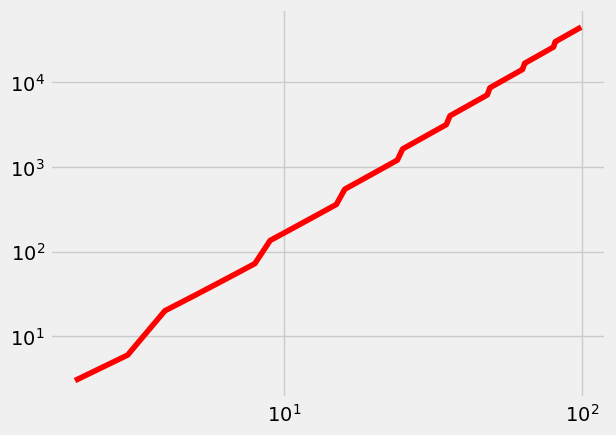

In [76]:
x = [] # lista vazia: coordenadas x
y = [] # lista vazia: coordenadas y
for n in range(2,100):
  x.append(n)     # acrescenta o valor atual de n no final da lista x
  y.append(f7(n)) # acrescenta o valor da função no fina da lista y

# Desenha o gráfico com linhas vermelhas
# (para usar escala logarítmica, descomente uma ou ambas linhas abaixo)
plt.yscale("log") # usa escala log para y (precisa ser feito a CADA novo gráfico)
plt.xscale("log") # idem, para x
plt.plot(x,y,'r-')
plt.show()


Lembre-se das **duas técnicas** simples que vimos: ao usar as escalas logarítmicas, conseguimos facilmente identificar o comportamento exponencial ou polinomial. A partir daí, é possível determinar o **expoente** da função, ou o **grau** do polinômio:

In [77]:
# Se for polinomial:

# Calcula o valor de dois pontos da função
a = 2
b = 100
fa = f7(a)
fb = f7(b)
expoente = (math.log(fb)-math.log(fa))/(math.log(b)-math.log(a))
print("Expoente aproximado da função polinomial:", expoente)

Expoente aproximado da função polinomial: 2.487489545202798


$expoente \approx \frac{\log(f(b)) - \log(f(a))}{\log(b)-\log(a)}$

## Algoritmo 8

In [21]:
def f8(n):
  res = 0
  for i in range(1,n+1):      # de 1 a n
    for j in range(i, 2*i+1): # de i a 2*i
      for k in range(i,j+1):  # de i a j
        res += 1
  return res

In [83]:
# Programa principal
for n in range(2,100):
  print(n, f8(n))

2 9
3 19
4 34
5 55
6 83
7 119
8 164
9 219
10 285
11 363
12 454
13 559
14 679
15 815
16 968
17 1139
18 1329
19 1539
20 1770
21 2023
22 2299
23 2599
24 2924
25 3275
26 3653
27 4059
28 4494
29 4959
30 5455
31 5983
32 6544
33 7139
34 7769
35 8435
36 9138
37 9879
38 10659
39 11479
40 12340
41 13243
42 14189
43 15179
44 16214
45 17295
46 18423
47 19599
48 20824
49 22099
50 23425
51 24803
52 26234
53 27719
54 29259
55 30855
56 32508
57 34219
58 35989
59 37819
60 39710
61 41663
62 43679
63 45759
64 47904
65 50115
66 52393
67 54739
68 57154
69 59639
70 62195
71 64823
72 67524
73 70299
74 73149
75 76075
76 79078
77 82159
78 85319
79 88559
80 91880
81 95283
82 98769
83 102339
84 105994
85 109735
86 113563
87 117479
88 121484
89 125579
90 129765
91 134043
92 138414
93 142879
94 147439
95 152095
96 156848
97 161699
98 166649
99 171699


Para fazer o gráfico, siga o seguinte modelo (x e y são **listas**, estrutura de dados nativa do Python).

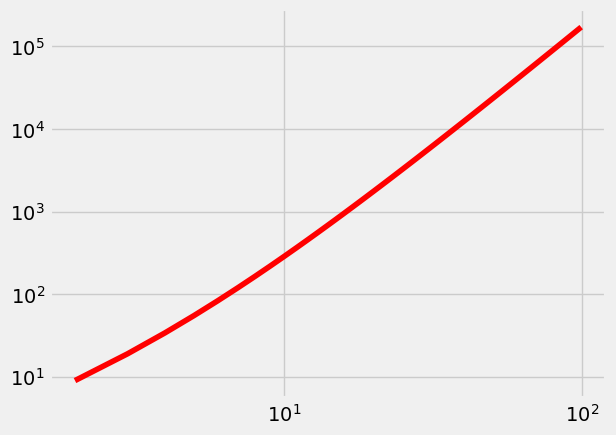

In [81]:
x = [] # lista vazia: coordenadas x
y = [] # lista vazia: coordenadas y
for n in range(2,100):
  x.append(n)     # acrescenta o valor atual de n no final da lista x
  y.append(f8(n)) # acrescenta o valor da função no fina da lista y

# Desenha o gráfico com linhas vermelhas
# (para usar escala logarítmica, descomente uma ou ambas linhas abaixo)
plt.yscale("log") # usa escala log para y (precisa ser feito a CADA novo gráfico)
plt.xscale("log") # idem, para x
plt.plot(x,y,'r-')
plt.show()


Lembre-se das **duas técnicas** simples que vimos: ao usar as escalas logarítmicas, conseguimos facilmente identificar o comportamento exponencial ou polinomial. A partir daí, é possível determinar o **expoente** da função, ou o **grau** do polinômio:

In [82]:
# Se for polinomial:

# Calcula o valor de dois pontos da função
a = 2
b = 100
fa = f8(a)
fb = f8(b)
expoente = (math.log(fb)-math.log(fa))/(math.log(b)-math.log(a))
print("Expoente aproximado da função polinomial:", expoente)

Expoente aproximado da função polinomial: 2.5270384666910886


$expoente \approx \frac{\log(f(b)) - \log(f(a))}{\log(b)-\log(a)}$

## Algoritmo 9

In [22]:
def f9(n):
  res = 0
  for i in range(1,n+1):     # de 1 a n.
    for j in range(i,i+4):   # de i a i+3
      for k in range(i,j+1): # de i a j
        res += 1
  return res

In [84]:
# Programa principal
for n in range(2,100):
  print(n, f9(n))

2 20
3 30
4 40
5 50
6 60
7 70
8 80
9 90
10 100
11 110
12 120
13 130
14 140
15 150
16 160
17 170
18 180
19 190
20 200
21 210
22 220
23 230
24 240
25 250
26 260
27 270
28 280
29 290
30 300
31 310
32 320
33 330
34 340
35 350
36 360
37 370
38 380
39 390
40 400
41 410
42 420
43 430
44 440
45 450
46 460
47 470
48 480
49 490
50 500
51 510
52 520
53 530
54 540
55 550
56 560
57 570
58 580
59 590
60 600
61 610
62 620
63 630
64 640
65 650
66 660
67 670
68 680
69 690
70 700
71 710
72 720
73 730
74 740
75 750
76 760
77 770
78 780
79 790
80 800
81 810
82 820
83 830
84 840
85 850
86 860
87 870
88 880
89 890
90 900
91 910
92 920
93 930
94 940
95 950
96 960
97 970
98 980
99 990


Para fazer o gráfico, siga o seguinte modelo (x e y são **listas**, estrutura de dados nativa do Python).

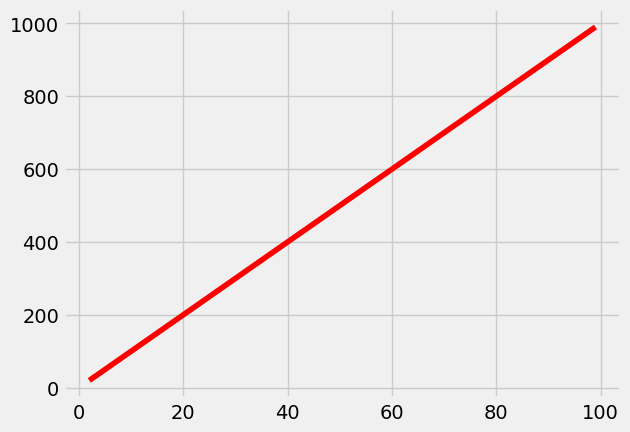

In [85]:
x = [] # lista vazia: coordenadas x
y = [] # lista vazia: coordenadas y
for n in range(2,100):
  x.append(n)     # acrescenta o valor atual de n no final da lista x
  y.append(f9(n)) # acrescenta o valor da função no fina da lista y

# Desenha o gráfico com linhas vermelhas
# (para usar escala logarítmica, descomente uma ou ambas linhas abaixo)
#plt.yscale("log") # usa escala log para y (precisa ser feito a CADA novo gráfico)
#plt.xscale("log") # idem, para x
plt.plot(x,y,'r-')
plt.show()


Lembre-se das **duas técnicas** simples que vimos: ao usar as escalas logarítmicas, conseguimos facilmente identificar o comportamento exponencial ou polinomial. A partir daí, é possível determinar o **expoente** da função, ou o **grau** do polinômio: